In [ ]:
from google.colab import drive
drive.mount('/content/drive')

path = '/content/drive/MyDrive/Univerui/Kursinis/'

Mounted at /content/drive


# Helper functions

In [ ]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
def calculate_results(y_true, y_pred):
  model_accuracy = accuracy_score(y_true, y_pred) * 100
  
  model_precision, model_recall, model_f1, _ = precision_recall_fscore_support(y_true, y_pred, average="weighted")
  model_results = {"accuracy": model_accuracy,
                  "precision": model_precision,
                  "recall": model_recall,
                  "f1": model_f1}
  return model_results

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

sns.light_palette("seagreen", as_cmap=True)

def plot_confusion_matrix(y_true, y_pred):
  cm = confusion_matrix(y_true, y_pred)
  labels = ['Benign', 'Malware']

  plt.figure(1, figsize=(9,6))
  axis = sns.heatmap(cm, annot=True, cbar=False, cmap='Greens', fmt='d')

  axis.set_xticklabels(labels)
  axis.set_yticklabels(labels)

  axis.set(ylabel='Tikros reikšmės', xlabel='Prognozuotos reikšmės')

  plt.show()

In [ ]:
def plot_loss_curves(history):
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Nuostoliai')
  plt.xlabel('Epochos')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Teisingumas')
  plt.xlabel('Epochos')
  plt.legend();

# Loading data

In [ ]:
import pandas as pd
train_data = pd.read_csv(path+'train_dataset.csv')
valid_data = pd.read_csv(path+'valid_dataset.csv')
test_data = pd.read_csv(path+'test_dataset.csv')

train_data.head()

,pslist.nproc,pslist.nppid,pslist.avg_threads,pslist.avg_handlers,dlllist.ndlls,dlllist.avg_dlls_per_proc,handles.nhandles,handles.avg_handles_per_proc,handles.nfile,handles.nevent,...,svcscan.nservices,svcscan.kernel_drivers,svcscan.fs_drivers,svcscan.process_services,svcscan.shared_process_services,svcscan.nactive,callbacks.ncallbacks,callbacks.nanonymous,callbacks.ngeneric,Class
0,-1.000000,0.00,-0.489278,-0.525639,-0.572505,-0.480974,-0.447922,-0.563055,-0.451613,-0.348355,...,-0.500000,0.0,0.0,0.000000,-0.5,-1.5,1.0,0.0,0.0,1
1,-1.333333,0.00,-0.409560,-0.859858,-0.838041,-0.740434,-0.765124,-0.835619,-0.559908,-0.767525,...,-1.166667,-1.0,0.0,-0.333333,-1.5,-4.0,1.0,0.0,0.0,1
2,1.000000,-0.75,0.491920,0.519117,0.783427,0.563137,0.853235,0.475160,0.670507,1.094421,...,0.500000,1.0,0.0,1.000000,0.5,1.5,1.0,0.0,0.0,0
3,1.666667,0.75,-0.157661,-0.547790,-0.062147,-0.542530,-0.057075,-0.542748,-0.375576,0.030043,...,-0.500000,0.0,0.0,0.000000,-0.5,0.5,-32.0,0.0,0.0,1
4,3.000000,0.50,0.277606,0.330270,1.250471,0.393810,1.172804,0.287495,0.937788,1.159514,...,0.000000,1.0,0.0,0.000000,0.5,2.0,0.0,0.0,0.0,0


In [ ]:
X_train = train_data.drop('Class', axis=1)
y_train = train_data['Class']

X_test = test_data.drop('Class', axis=1)
y_test = test_data['Class']

X_valid = valid_data.drop('Class', axis=1)
y_valid = valid_data['Class']

len(X_train), len(y_train), len(X_test), len(y_test), len(X_valid), len(y_valid)

(40940, 40940, 8790, 8790, 8866, 8866)

In [ ]:
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()
X_valid = X_valid.to_numpy()

# Modeling

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, SimpleRNN, BatchNormalization, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers

In [ ]:
tf.random.set_seed(42)

## MLP

In [ ]:
mlp_model_1 = tf.keras.Sequential([
    Dense(125, input_shape=X_train[0].shape, activation='relu'),
    Dense(1, activation='sigmoid')
])

mlp_model_1.compile(loss='binary_crossentropy',
                    optimizer=Adam(),
                    metrics=['accuracy'])

mlp_history = mlp_model_1.fit(X_train, y_train,
                                      epochs=10,
                                      batch_size=32,
                                      validation_data=(X_valid, y_valid))

Epoch 1/10
1280/1280 [==============================] - 6s 4ms/step - loss: 0.0199 - accuracy: 0.9945 - val_loss: 0.0057 - val_accuracy: 0.9989
Epoch 2/10
1280/1280 [==============================] - 3s 3ms/step - loss: 0.0034 - accuracy: 0.9988 - val_loss: 0.0017 - val_accuracy: 0.9994
Epoch 3/10
1280/1280 [==============================] - 3s 2ms/step - loss: 0.0019 - accuracy: 0.9993 - val_loss: 8.6830e-04 - val_accuracy: 0.9997
Epoch 4/10
1280/1280 [==============================] - 6s 5ms/step - loss: 0.0014 - accuracy: 0.9995 - val_loss: 3.8334e-04 - val_accuracy: 0.9999
Epoch 5/10
1280/1280 [==============================] - 5s 4ms/step - loss: 9.0594e-04 - accuracy: 0.9997 - val_loss: 3.9769e-04 - val_accuracy: 0.9999
Epoch 6/10
1280/1280 [==============================] - 5s 4ms/step - loss: 5.0587e-04 - accuracy: 0.9999 - val_loss: 1.7005e-04 - val_accuracy: 1.0000
Epoch 7/10
1280/1280 [==============================] - 3s 3ms/step - loss: 4.4887e-04 - accuracy: 0.9999 - val_

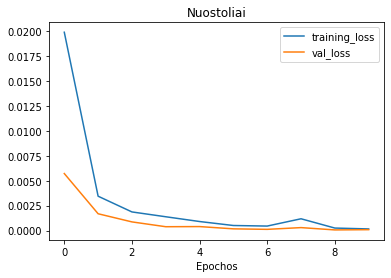

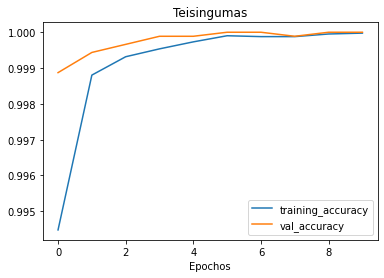

In [ ]:
plot_loss_curves(mlp_history)

In [ ]:
mlp_pred = mlp_model_1.predict(X_test)
calculate_results(y_test, tf.round(mlp_pred))

275/275 [==============================] - 0s 1ms/step


{'accuracy': 100.0, 'precision': 1.0, 'recall': 1.0, 'f1': 1.0}

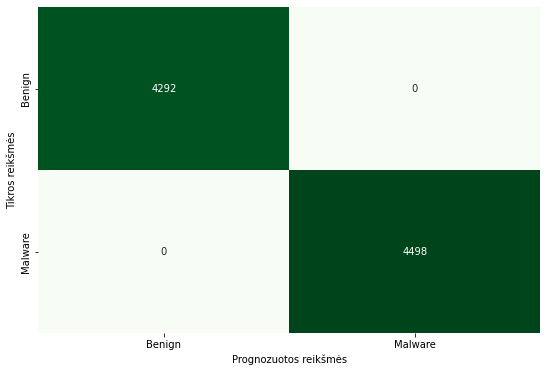

In [ ]:
plot_confusion_matrix(y_test, tf.round(mlp_pred))

In [ ]:
mlp_model_1.save('/content/drive/MyDrive/Univerui/Kursinis/models/mlp_model.h5')

## RNN

In [ ]:
X_train[0].shape

(52,)

In [ ]:
rnn_model = tf.keras.Sequential([
    SimpleRNN(64, input_dim=1, input_length=X_train[0].shape[0]),
    Dense(1, activation='sigmoid')
])

rnn_model.compile(loss='binary_crossentropy',
                  optimizer=Adam(),
                  metrics=['accuracy'])

rnn_history = rnn_model.fit(X_train, y_train,
                            epochs=10,
                            batch_size=32,
                            validation_data=(X_valid, y_valid))

Epoch 1/10
1280/1280 [==============================] - 17s 12ms/step - loss: 0.0206 - accuracy: 0.9961 - val_loss: 0.0088 - val_accuracy: 0.9981
Epoch 2/10
1280/1280 [==============================] - 16s 12ms/step - loss: 0.0096 - accuracy: 0.9981 - val_loss: 0.0064 - val_accuracy: 0.9986
Epoch 3/10
1280/1280 [==============================] - 16s 12ms/step - loss: 0.0072 - accuracy: 0.9986 - val_loss: 0.0066 - val_accuracy: 0.9988
Epoch 4/10
1280/1280 [==============================] - 16s 12ms/step - loss: 0.0054 - accuracy: 0.9989 - val_loss: 0.0036 - val_accuracy: 0.9990
Epoch 5/10
1280/1280 [==============================] - 16s 12ms/step - loss: 0.0036 - accuracy: 0.9992 - val_loss: 0.0029 - val_accuracy: 0.9993
Epoch 6/10
1280/1280 [==============================] - 20s 16ms/step - loss: 0.0059 - accuracy: 0.9984 - val_loss: 0.0139 - val_accuracy: 0.9976
Epoch 7/10
1280/1280 [==============================] - 18s 14ms/step - loss: 0.0078 - accuracy: 0.9986 - val_loss: 0.0066 -

In [ ]:
rnn_pred = rnn_model.predict(X_test)

275/275 [==============================] - 3s 8ms/step


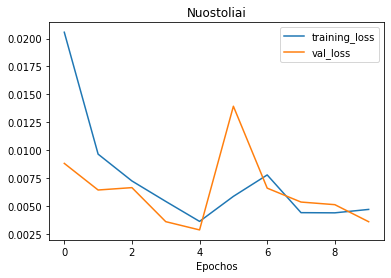

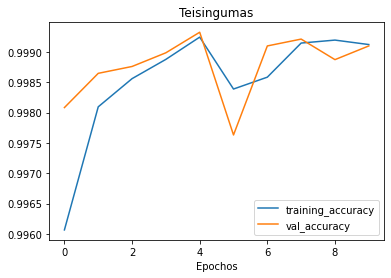

In [ ]:
plot_loss_curves(rnn_history)

In [ ]:
calculate_results(y_test, tf.round(rnn_pred))

{'accuracy': 99.94311717861206,
 'precision': 0.9994313955188239,
 'recall': 0.9994311717861206,
 'f1': 0.9994311671674551}

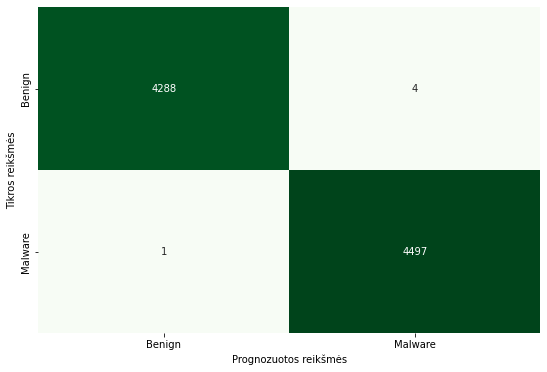

In [ ]:
plot_confusion_matrix(y_test, tf.round(rnn_pred))

In [ ]:
rnn_model.save('/content/drive/MyDrive/Univerui/Kursinis/models/rnn_model.h5')

## Autoencoder + MLP

### Baseline

In [ ]:
inputs = Input(shape=(52,))

# Defining encoder
encoder = Dense(32, activation='relu')(inputs)
encoder = Dense(16, activation='relu')(encoder)

# Defining bottleneck
bottleneck = Dense(8, activation='relu')(encoder)

# Defining decoder
decoder = Dense(16, activation='relu')(bottleneck)
decoder = Dense(32, activation='relu')(decoder)

outputs = Dense(52, activation='relu')(decoder)

ae_model = tf.keras.Model(inputs, outputs)

ae_model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 52)]              0         
                                                                 
 dense_32 (Dense)            (None, 32)                1696      
                                                                 
 dense_33 (Dense)            (None, 16)                528       
                                                                 
 dense_34 (Dense)            (None, 8)                 136       
                                                                 
 dense_35 (Dense)            (None, 16)                144       
                                                                 
 dense_36 (Dense)            (None, 32)                544       
                                                                 
 dense_37 (Dense)            (None, 52)                1716

In [ ]:
ae_model.compile(loss='mae',
                 optimizer='adadelta',
                 metrics=['accuracy'])

ae_history =ae_model.fit(X_train, y_train,
            epochs=10,
            batch_size=32,
            validation_data=(X_valid, y_valid))

Epoch 1/10
1280/1280 [==============================] - 4s 3ms/step - loss: 3.2282 - accuracy: 0.0015 - val_loss: 3.0766 - val_accuracy: 6.7674e-04
Epoch 2/10
1280/1280 [==============================] - 4s 3ms/step - loss: 3.0011 - accuracy: 0.0015 - val_loss: 2.8613 - val_accuracy: 6.7674e-04
Epoch 3/10
1280/1280 [==============================] - 3s 3ms/step - loss: 2.8063 - accuracy: 0.0017 - val_loss: 2.6804 - val_accuracy: 0.0016
Epoch 4/10
1280/1280 [==============================] - 3s 3ms/step - loss: 2.6133 - accuracy: 0.0035 - val_loss: 2.4913 - val_accuracy: 0.0054
Epoch 5/10
1280/1280 [==============================] - 3s 2ms/step - loss: 2.4313 - accuracy: 0.0127 - val_loss: 2.3162 - val_accuracy: 0.0186
Epoch 6/10
1280/1280 [==============================] - 4s 3ms/step - loss: 2.2620 - accuracy: 0.0301 - val_loss: 2.1574 - val_accuracy: 0.0315
Epoch 7/10
1280/1280 [==============================] - 3s 3ms/step - loss: 2.1065 - accuracy: 0.0427 - val_loss: 2.0099 - val_a

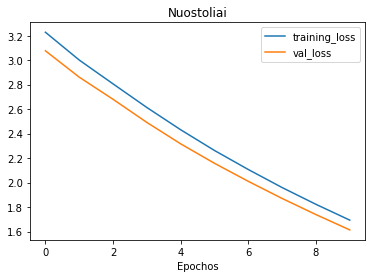

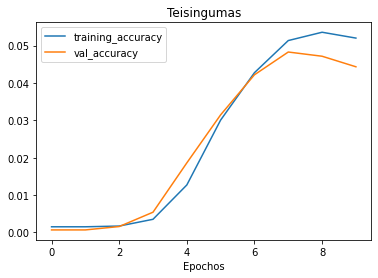

In [ ]:
plot_loss_curves(ae_history)

### Changing activation function from relu to tanh

In [ ]:
inputs = Input(shape=(52,))

# Defining encoder
encoder = Dense(32, activation='tanh')(inputs)
encoder = Dense(16, activation='tanh')(encoder)

# Defining bottleneck
bottleneck = Dense(8, activation='tanh')(encoder)

# Defining decoder
decoder = Dense(16, activation='tanh')(bottleneck)
decoder = Dense(32, activation='tanh')(decoder)

outputs = Dense(52, activation='tanh')(decoder)

ae_model_1 = tf.keras.Model(inputs, outputs)

In [ ]:
ae_model_1.compile(loss='mae',
                 optimizer='adadelta',
                 metrics=['accuracy'])

ae_history_1 =ae_model_1.fit(X_train, y_train,
            epochs=10,
            batch_size=32,
            validation_data=(X_valid, y_valid))

Epoch 1/10
1280/1280 [==============================] - 6s 4ms/step - loss: 0.5622 - accuracy: 0.0313 - val_loss: 0.5525 - val_accuracy: 0.0380
Epoch 2/10
1280/1280 [==============================] - 4s 3ms/step - loss: 0.5496 - accuracy: 0.0476 - val_loss: 0.5404 - val_accuracy: 0.0508
Epoch 3/10
1280/1280 [==============================] - 3s 3ms/step - loss: 0.5384 - accuracy: 0.0577 - val_loss: 0.5300 - val_accuracy: 0.0601
Epoch 4/10
1280/1280 [==============================] - 4s 3ms/step - loss: 0.5288 - accuracy: 0.0667 - val_loss: 0.5211 - val_accuracy: 0.0667
Epoch 5/10
1280/1280 [==============================] - 4s 3ms/step - loss: 0.5205 - accuracy: 0.0689 - val_loss: 0.5132 - val_accuracy: 0.0660
Epoch 6/10
1280/1280 [==============================] - 3s 3ms/step - loss: 0.5129 - accuracy: 0.0697 - val_loss: 0.5058 - val_accuracy: 0.0667
Epoch 7/10
1280/1280 [==============================] - 3s 3ms/step - loss: 0.5056 - accuracy: 0.0729 - val_loss: 0.4985 - val_accuracy:

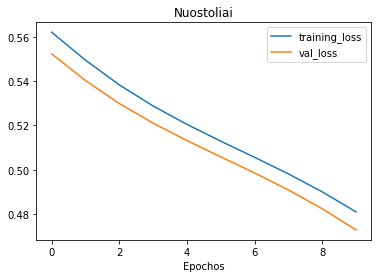

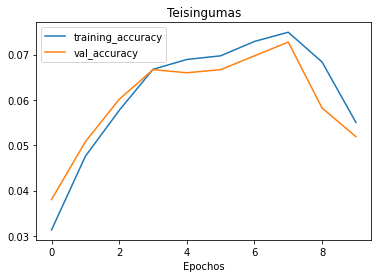

In [ ]:
plot_loss_curves(ae_history_1)

### Adding activity regulizers to encoder and decoders

In [ ]:
inputs = Input(shape=(52,))

# Defining encoder
encoder = Dense(32, activation='tanh',
                activity_regularizer = regularizers.l1())(inputs)
encoder = Dense(16, activation='tanh',
                activity_regularizer = regularizers.l1())(encoder)

# Defining bottleneck
bottleneck = Dense(8, activation='tanh')(encoder)

# Defining decoder
decoder = Dense(16, activation='tanh',
                activity_regularizer = regularizers.l1())(bottleneck)
decoder = Dense(32, activation='tanh',
                activity_regularizer = regularizers.l1())(decoder)

outputs = Dense(52, activation='tanh')(decoder)

ae_model_2 = tf.keras.Model(inputs, outputs)

ae_model_2.compile(loss='mae',
                 optimizer='adadelta',
                 metrics=['accuracy'])

ae_history_2 =ae_model_2.fit(X_train, y_train,
            epochs=10,
            batch_size=32,
            validation_data=(X_valid, y_valid))

Epoch 1/10
1280/1280 [==============================] - 5s 3ms/step - loss: 0.9061 - accuracy: 3.4196e-04 - val_loss: 0.8797 - val_accuracy: 3.3837e-04
Epoch 2/10
1280/1280 [==============================] - 3s 3ms/step - loss: 0.8613 - accuracy: 4.6409e-04 - val_loss: 0.8361 - val_accuracy: 3.3837e-04
Epoch 3/10
1280/1280 [==============================] - 3s 3ms/step - loss: 0.8231 - accuracy: 4.8852e-04 - val_loss: 0.8034 - val_accuracy: 7.8953e-04
Epoch 4/10
1280/1280 [==============================] - 4s 3ms/step - loss: 0.7949 - accuracy: 5.3737e-04 - val_loss: 0.7794 - val_accuracy: 0.0010
Epoch 5/10
1280/1280 [==============================] - 4s 3ms/step - loss: 0.7736 - accuracy: 7.3278e-04 - val_loss: 0.7609 - val_accuracy: 0.0014
Epoch 6/10
1280/1280 [==============================] - 3s 3ms/step - loss: 0.7567 - accuracy: 8.0606e-04 - val_loss: 0.7457 - val_accuracy: 0.0014
Epoch 7/10
1280/1280 [==============================] - 3s 3ms/step - loss: 0.7425 - accuracy: 9.037

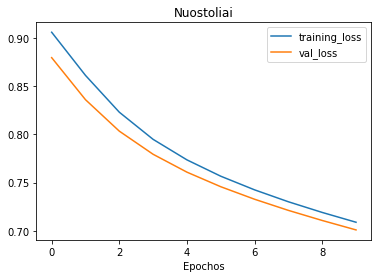

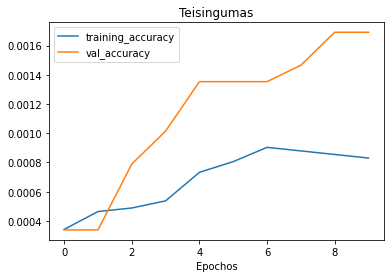

In [ ]:
plot_loss_curves(ae_history_2)

### Instead of activity  regulizer trying batch normalization

In [ ]:
inputs = Input(shape=(52,))

# Defining encoder
encoder = Dense(32, activation='tanh')(inputs)
encoder = BatchNormalization()(encoder)
encoder = Dense(16, activation='tanh')(encoder)
encoder = BatchNormalization()(encoder)

# Defining bottleneck
bottleneck = Dense(8, activation='tanh')(encoder)

# Defining decoder
decoder = Dense(16, activation='tanh')(bottleneck)
decoder = BatchNormalization()(decoder)
decoder = Dense(32, activation='tanh')(decoder)
decoder = BatchNormalization()(decoder)

outputs = Dense(52, activation='tanh')(decoder)

ae_model_3 = tf.keras.Model(inputs, outputs)

ae_model_3.compile(loss='mae',
                 optimizer='adadelta',
                 metrics=['accuracy'])

ae_history_3 =ae_model_3.fit(X_train, y_train,
            epochs=10,
            batch_size=32,
            validation_data=(X_valid, y_valid))

Epoch 1/10
1280/1280 [==============================] - 48s 4ms/step - loss: 0.7282 - accuracy: 0.0159 - val_loss: 0.7121 - val_accuracy: 0.0090
Epoch 2/10
1280/1280 [==============================] - 5s 4ms/step - loss: 0.7054 - accuracy: 0.0152 - val_loss: 0.6875 - val_accuracy: 0.0082
Epoch 3/10
1280/1280 [==============================] - 5s 4ms/step - loss: 0.6849 - accuracy: 0.0175 - val_loss: 0.6674 - val_accuracy: 0.0115
Epoch 4/10
1280/1280 [==============================] - 4s 3ms/step - loss: 0.6656 - accuracy: 0.0204 - val_loss: 0.6477 - val_accuracy: 0.0135
Epoch 5/10
1280/1280 [==============================] - 5s 4ms/step - loss: 0.6468 - accuracy: 0.0228 - val_loss: 0.6296 - val_accuracy: 0.0176
Epoch 6/10
1280/1280 [==============================] - 4s 3ms/step - loss: 0.6277 - accuracy: 0.0248 - val_loss: 0.6072 - val_accuracy: 0.0186
Epoch 7/10
1280/1280 [==============================] - 4s 3ms/step - loss: 0.6094 - accuracy: 0.0274 - val_loss: 0.5913 - val_accuracy

### first experimentation with batch normalization

In [ ]:
inputs = Input(shape=(52,))

# Defining encoder
encoder = Dense(32, activation='relu')(inputs)
encoder = BatchNormalization()(encoder)
encoder = Dense(16, activation='relu')(encoder)
encoder = BatchNormalization()(encoder)

# Defining bottleneck
bottleneck = Dense(8, activation='relu')(encoder)

# Defining decoder
decoder = Dense(16, activation='relu')(bottleneck)
decoder = BatchNormalization()(decoder)
decoder = Dense(32, activation='relu')(decoder)
decoder = BatchNormalization()(decoder)
outputs = Dense(52, activation='relu')(decoder)

ae_model_4 = tf.keras.Model(inputs, outputs)

ae_model_4.compile(loss='mae',
                 optimizer='adadelta',
                 metrics=['accuracy'])

ae_history_4 =ae_model_4.fit(X_train, y_train,
            epochs=10,
            batch_size=32,
            validation_data=(X_valid, y_valid))

Epoch 1/10
1280/1280 [==============================] - 7s 4ms/step - loss: 0.5236 - accuracy: 0.0028 - val_loss: 0.5164 - val_accuracy: 0.0000e+00
Epoch 2/10
1280/1280 [==============================] - 5s 4ms/step - loss: 0.5159 - accuracy: 0.0024 - val_loss: 0.5159 - val_accuracy: 0.0000e+00
Epoch 3/10
1280/1280 [==============================] - 5s 4ms/step - loss: 0.5087 - accuracy: 0.0028 - val_loss: 0.5091 - val_accuracy: 0.0000e+00
Epoch 4/10
1280/1280 [==============================] - 5s 4ms/step - loss: 0.5010 - accuracy: 0.0026 - val_loss: 0.5079 - val_accuracy: 0.0000e+00
Epoch 5/10
1280/1280 [==============================] - 5s 4ms/step - loss: 0.4937 - accuracy: 0.0028 - val_loss: 0.5021 - val_accuracy: 0.0000e+00
Epoch 6/10
1280/1280 [==============================] - 5s 4ms/step - loss: 0.4863 - accuracy: 0.0031 - val_loss: 0.4970 - val_accuracy: 0.0000e+00
Epoch 7/10
1280/1280 [==============================] - 4s 3ms/step - loss: 0.4786 - accuracy: 0.0033 - val_loss

##  first model of autoencoder trained for longer

In [ ]:
es_callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

In [ ]:
inputs = Input(shape=(52,))

# Defining encoder
encoder = Dense(32, activation='relu')(inputs)
encoder = Dense(16, activation='relu')(encoder)

# Defining bottleneck
bottleneck = Dense(8, activation='relu')(encoder)

# Defining decoder
decoder = Dense(16, activation='relu')(bottleneck)
decoder = Dense(32, activation='relu')(decoder)

outputs = Dense(52, activation='relu')(decoder)

ae_model_f = tf.keras.Model(inputs, outputs)


In [ ]:
ae_model_f.compile(loss='mae',
                 optimizer='adadelta',
                 metrics=['accuracy'])

ae_history_f =ae_model_f.fit(X_train, y_train,
            epochs=300,
            batch_size=32,
            validation_data=(X_valid, y_valid),
            callbacks=[es_callback])

Epoch 1/300
1280/1280 [==============================] - 6s 3ms/step - loss: 1.6223 - accuracy: 0.0020 - val_loss: 1.5652 - val_accuracy: 0.0016
Epoch 2/300
1280/1280 [==============================] - 3s 2ms/step - loss: 1.5397 - accuracy: 0.0022 - val_loss: 1.4894 - val_accuracy: 0.0025
Epoch 3/300
1280/1280 [==============================] - 3s 2ms/step - loss: 1.4707 - accuracy: 0.0028 - val_loss: 1.4241 - val_accuracy: 0.0034
Epoch 4/300
1280/1280 [==============================] - 3s 2ms/step - loss: 1.4003 - accuracy: 0.0032 - val_loss: 1.3540 - val_accuracy: 0.0037
Epoch 5/300
1280/1280 [==============================] - 3s 3ms/step - loss: 1.3326 - accuracy: 0.0044 - val_loss: 1.2891 - val_accuracy: 0.0064
Epoch 6/300
1280/1280 [==============================] - 3s 2ms/step - loss: 1.2680 - accuracy: 0.0078 - val_loss: 1.2264 - val_accuracy: 0.0086
Epoch 7/300
1280/1280 [==============================] - 3s 3ms/step - loss: 1.2063 - accuracy: 0.0112 - val_loss: 1.1672 - val_ac

In [ ]:
ae_classifier = tf.keras.Sequential([
    Input(shape=(52,)),
    ae_model_f.layers[0],
    ae_model_f.layers[1],
    ae_model_f.layers[2],
    Dense(1, activation='sigmoid')
])

ae_classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        multiple                  0         
                                                                 
 dense (Dense)               (None, 32)                1696      
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_6 (Dense)             (None, 1)                 17        
                                                                 
Total params: 2,241
Trainable params: 2,241
Non-trainable params: 0
_________________________________________________________________


In [ ]:
ae_classifier.compile(loss='binary_crossentropy',
                      optimizer=Adam(),
                      metrics=['accuracy'])

ae_history_c = ae_classifier.fit(X_train, y_train,
                                 epochs=10,
                                 batch_size=32,
                                 validation_data=(X_valid, y_valid))

Epoch 1/10
1280/1280 [==============================] - 5s 3ms/step - loss: 0.1053 - accuracy: 0.9797 - val_loss: 0.0080 - val_accuracy: 0.9975
Epoch 2/10
1280/1280 [==============================] - 3s 2ms/step - loss: 0.0051 - accuracy: 0.9985 - val_loss: 0.0030 - val_accuracy: 0.9991
Epoch 3/10
1280/1280 [==============================] - 3s 2ms/step - loss: 0.0029 - accuracy: 0.9990 - val_loss: 0.0016 - val_accuracy: 0.9995
Epoch 4/10
1280/1280 [==============================] - 3s 2ms/step - loss: 0.0019 - accuracy: 0.9994 - val_loss: 9.2003e-04 - val_accuracy: 0.9995
Epoch 5/10
1280/1280 [==============================] - 3s 3ms/step - loss: 0.0014 - accuracy: 0.9995 - val_loss: 7.3439e-04 - val_accuracy: 0.9998
Epoch 6/10
1280/1280 [==============================] - 3s 3ms/step - loss: 8.2858e-04 - accuracy: 0.9998 - val_loss: 3.2956e-04 - val_accuracy: 1.0000
Epoch 7/10
1280/1280 [==============================] - 4s 3ms/step - loss: 4.0049e-04 - accuracy: 1.0000 - val_loss: 1.

In [ ]:
ae_classifier.save('/content/drive/MyDrive/Univerui/Kursinis/models/aec_model.h5')

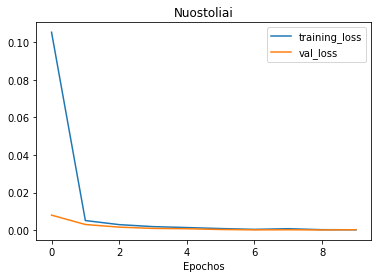

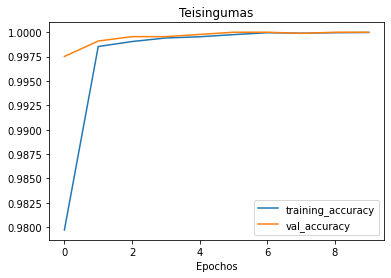

In [ ]:
plot_loss_curves(ae_history_c)

In [ ]:
ae_pred = ae_classifier.predict(X_test)

275/275 [==============================] - 1s 3ms/step


In [ ]:
calculate_results(y_test, tf.round(ae_pred))

{'accuracy': 100.0, 'precision': 1.0, 'recall': 1.0, 'f1': 1.0}

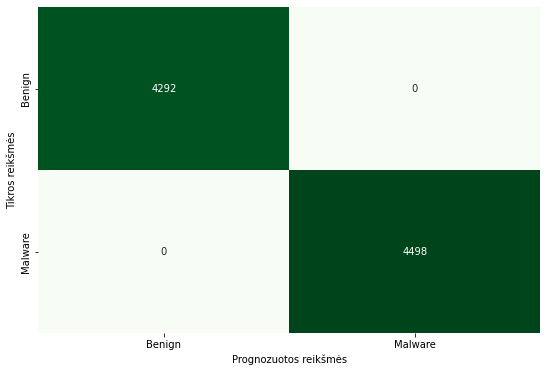

In [ ]:
plot_confusion_matrix(y_test, tf.round(ae_pred))